<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EC%97%B0%EC%82%B0%EC%9A%94%EC%95%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!python3 -m pip install qiskit[visualization]
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**양자 연산 요약**

In [55]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [56]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend(name='unitary_simulator')

**단일 큐빗 게이트**


* U 게이트
* P 게이트
* Identity 게이트
* Pauli 게이트
* Clifford 게이트
* C3 게이트 
* 표준 회전(Standard rotation) 게이트

In [57]:
q = QuantumRegister(size=1)

**U 게이트**

In [58]:
qc = QuantumCircuit(q)
qc.u(pi/2, pi/4, pi/8, q)
qc.draw()

┌────────────────┐
q19: ┤ U(π/2,π/4,π/8) ├
     └────────────────┘

In [59]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

In [60]:
# qc.u1(lambda) is now:
#qc.p(lambda)

# qc.u2(phi, lambda) is now:
#qc.u(pi/2, phi, lambda)

# qc.u3(theta, phi, lambda) is now:
#qc.u(theta, phi, lambda)

**P 게이트**

In [61]:
qc = QuantumCircuit(q)
qc.p(theta=pi/2, qubit=q)
qc.draw()

┌────────┐
q19: ┤ P(π/2) ├
     └────────┘

In [62]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

**항등(identity) 게이트**

In [63]:
qc = QuantumCircuit(q)
qc.id(qubit=q)
qc.draw()

┌───┐
q19: ┤ I ├
     └───┘

In [64]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

**파울리(Pauli) 게이트**
X: 비트 플립 게이트

In [65]:
qc = QuantumCircuit(q)
qc.x(qubit=q)
qc.draw()

┌───┐
q19: ┤ X ├
     └───┘

In [66]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

Y: 비트와 위상 플립 게이트

In [67]:
qc = QuantumCircuit(q)
qc.y(qubit=q)
qc.draw()

┌───┐
q19: ┤ Y ├
     └───┘

In [68]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

**Z: 위상 플립 게이트**

In [69]:
qc = QuantumCircuit(q)
qc.z(qubit=q)
qc.draw()

┌───┐
q19: ┤ Z ├
     └───┘

In [70]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

**클리포드(Clifford) 게이트**

하다마드(Hadamard) 게이트

In [71]:
qc = QuantumCircuit(q)
qc.h(qubit=q)
qc.draw()

┌───┐
q19: ┤ H ├
     └───┘

In [72]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

**S(or, root(Z)위상) 게이트**

In [73]:
qc = QuantumCircuit(q)
qc.s(qubit=q)
qc.draw()

┌───┐
q19: ┤ S ├
     └───┘

In [74]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

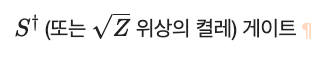

In [75]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw()

┌─────┐
q19: ┤ Sdg ├
     └─────┘

In [76]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

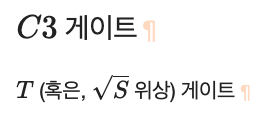

In [77]:
qc = QuantumCircuit(q)
qc.t(qubit=q)
qc.draw()

┌───┐
q19: ┤ T ├
     └───┘

In [78]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

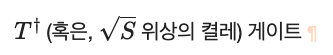

In [79]:
qc = QuantumCircuit(q)
qc.tdg(qubit=q)
qc.draw()

┌─────┐
q19: ┤ Tdg ├
     └─────┘

In [80]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

**표준회전**

X축에 관한 회전

In [81]:
qc = QuantumCircuit(q)
qc.rx(theta=pi/2, qubit=q)
qc.draw()

┌─────────┐
q19: ┤ Rx(π/2) ├
     └─────────┘

In [82]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

Y축에 관한 회전

In [83]:
qc = QuantumCircuit(q)
qc.ry(theta=pi/2, qubit=q)
qc.draw()

┌─────────┐
q19: ┤ Ry(π/2) ├
     └─────────┘

In [84]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

Z축에 관한 회전

In [85]:
qc = QuantumCircuit(q)
qc.rz(phi=pi/2, qubit=q)
qc.draw()

┌─────────┐
q19: ┤ Rz(π/2) ├
     └─────────┘

In [86]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

**다중 큐비트 게이트**

두 큐비트 게이트
* 제어 파울리 게이트 (controlled Pauli gates)
* 제어 하다마드 게이트 (controlled Hadamard gate)
* 제어 회전 게이트 (controlled rotation gates)
* 제어 위상 게이트 (controlled phase gate)
* 제어 u3게이트 (controlled u3 gate)
* 교환 게이트 (swap gate)

세 큐비트 게이트
* Toffoli gate
* Fredkin gate

In [87]:
q = QuantumRegister(size = 2)

**제어 파울리 게이트(Controlled Pauli Gate)**

Controlled-X (또는, Controlled-NOT) 게이트

In [88]:
qc = QuantumCircuit(q)
qc.cx(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q34_0: ──■──
       ┌─┴─┐
q34_1: ┤ X ├
       └───┘

In [89]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

제어 Y 게이트 (Controlled Y Gate)¶

In [90]:
qc = QuantumCircuit(q)
qc.cy(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q34_0: ──■──
       ┌─┴─┐
q34_1: ┤ Y ├
       └───┘

In [91]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

Controlled Z (위상 제어) 게이트

In [92]:
qc = QuantumCircuit(q)
qc.cz(control_qubit=q[0], target_qubit=q[1])
qc.draw()

q34_0: ─■─
        │ 
q34_1: ─■─

In [93]:
job = backend.run(qobj=transpile(circuits=qc, backend=backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

조절된 Hadamard 게이트